**KNN WHITE BLOOD CELLS CLASSIFICATION ALGORITHM**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from os import listdir
import cv2
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report

In [ ]:
data = []
folder_dir = "drive/My Drive/Raabin - WBC/crop_dataset/"
count = 0
for wbc in os.listdir(folder_dir):
    count=0
    for images in os.listdir(folder_dir+"/"+wbc):
        data.append([folder_dir+"/"+wbc+"/"+images,wbc])
data1 = pd.DataFrame(data,columns=['images','Category'])
data1.head()

,images,Category
0,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
1,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
2,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
3,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil
4,drive/My Drive/Raabin - WBC/crop_dataset//eosi...,eosinophil


In [ ]:
from progressbar import ProgressBar
pbar = ProgressBar()

In [ ]:
data = []
lables = []
c = 0 ## to see the progress
for image in pbar(data1['images']):

    lables.append(data1['Category'][c])
    img = cv2.imread(image)
    data.append(img.flatten())
    c=c+1

100% (60 of 60) |########################| Elapsed Time: 0:00:23 Time:  0:00:23


In [3]:
data = np.load("drive/My Drive/Raabin - WBC/data.npy")
lables = np.load("drive/My Drive/Raabin - WBC/lable.npy")

data = np.array([i.flatten() for i in data])


In [4]:
# encode the labels as integer
data = np.array(data)
lables = np.array(lables)
lables_df = pd.DataFrame(np.unique(lables))
le = LabelEncoder()
lables = le.fit_transform(lables)

In [5]:
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.25)

**KNN**

In [6]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(trainX, trainY)

print(classification_report(testY, model.predict(testX), target_names=le.classes_))

              precision    recall  f1-score   support

  eosinophil       0.88      0.83      0.85       384
  lymphocyte       0.71      0.96      0.82       301
    monocyte       0.78      0.78      0.78       332
  neutrophil       0.97      0.75      0.85       366

    accuracy                           0.82      1383
   macro avg       0.83      0.83      0.82      1383
weighted avg       0.84      0.82      0.82      1383



In [7]:
print(classification_report(trainY, model.predict(trainX), target_names=le.classes_))

              precision    recall  f1-score   support

  eosinophil       0.90      0.87      0.89      1111
  lymphocyte       0.72      0.98      0.83       877
    monocyte       0.83      0.76      0.79      1026
  neutrophil       0.99      0.81      0.89      1133

    accuracy                           0.85      4147
   macro avg       0.86      0.86      0.85      4147
weighted avg       0.87      0.85      0.85      4147



Accuracy: 0.82
['monocyte' 'eosinophil' 'monocyte' ... 'monocyte' 'monocyte' 'monocyte']


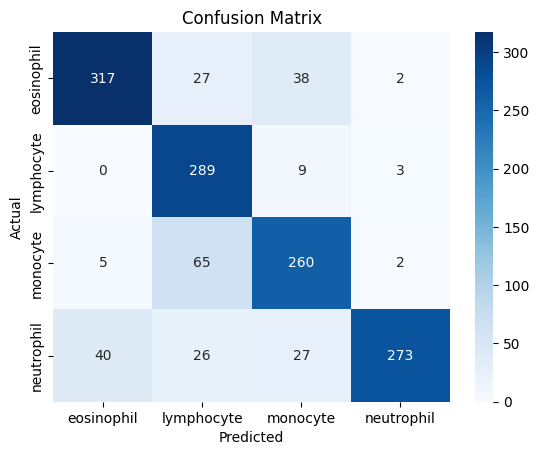

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
y_pred = model.predict(testX)
# Evaluate accuracy
accuracy = accuracy_score(testY, y_pred)
print(f"Accuracy: {accuracy:.2f}")
y_pred = le.inverse_transform(y_pred)
print(y_pred)

# Create confusion matrix
conf_mat = confusion_matrix(le.inverse_transform(testY),y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(lables_df[0]), yticklabels=np.unique(lables_df[0]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()